## Ejemplos de preparación de datos para una RNN

### Predicción del valor de la acción de una empresa

Predecir el valor de las acciones de una compañia.
- Se utilizarán las 5 observaciones anteriores 
- Tenemos los datos de 138 días
- ¿Cuanto vale N, T, D?

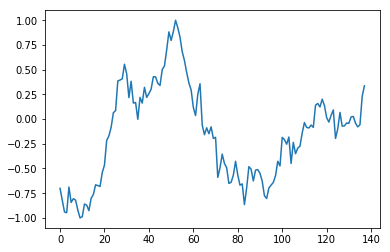

138


In [33]:
apple_stock = np.loadtxt('apple/normalized_apple_prices.csv')
from matplotlib import pyplot as plt
plt.plot(apple_stock)
plt.show()
print(len(apple_stock))

In [44]:
from RNN_utils import window_transform_series
X_, y = window_transform_series(apple_stock, 5)

In [45]:
print(X_.shape)
print(X_[0:10,:])

(133, 5)
[[-0.70062339 -0.82088484 -0.93938305 -0.9471652  -0.68785527]
 [-0.82088484 -0.93938305 -0.9471652  -0.68785527 -0.84325902]
 [-0.93938305 -0.9471652  -0.68785527 -0.84325902 -0.80532018]
 [-0.9471652  -0.68785527 -0.84325902 -0.80532018 -0.82058073]
 [-0.68785527 -0.84325902 -0.80532018 -0.82058073 -0.92023124]
 [-0.84325902 -0.80532018 -0.82058073 -0.92023124 -1.        ]
 [-0.80532018 -0.82058073 -0.92023124 -1.         -0.98814438]
 [-0.82058073 -0.92023124 -1.         -0.98814438 -0.85961411]
 [-0.92023124 -1.         -0.98814438 -0.85961411 -0.8706188 ]
 [-1.         -0.98814438 -0.85961411 -0.8706188  -0.92661512]]


In [46]:
# Parece un detalle pero las capas recurrentes en Keras exigen este formato
X = X_.reshape(X_.shape[0], X_.shape[1], 1) 

In [47]:
print('(N, T, D):')
print(X.shape)

(N, T, D):
(133, 5, 1)


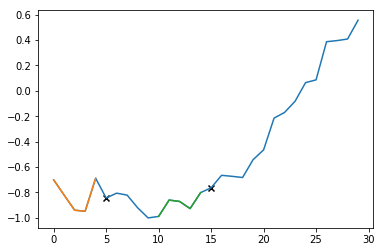

In [48]:
plt.plot(apple_stock[:30])
i1 = 0
plt.plot(range(i1,i1+5),X_[i1])
plt.scatter(i1+5, y[i1], marker='x', color='k')
i1 = 10
plt.plot(range(i1,i1+5),X_[i1])
plt.scatter(i1+5, y[i1], marker='x', color='k')

plt.show()

### SimpleRNN + Dense para stock prices

In [29]:
window_size = 40
rnn_cells = 10
model_rnn = Sequential()
model_rnn.add(SimpleRNN(rnn_cells, input_shape = (window_size,1)))
model_rnn.add(Dense(1))
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Observaciones:
- Capa densa. Que función de activación estamos usando?

## Un error común

In [30]:
model_rnn_error = Sequential()
model_rnn_error.add(SimpleRNN(rnn_cells, input_shape = (1,window_size)))
model_rnn_error.add(Dense(1))
model_rnn_error.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


Preguntas:
- Que diferencia hay con la anterior?
- Por que la diferencia en cantidad de parámetros?
- Se puede pensar como un FNN (MLP)?

## FFN (MLP)

In [31]:
model_fnn = Sequential()
model_fnn.add(Dense(rnn_cells, input_shape=(window_size,) ))
model_fnn.add(Dense(1))
model_fnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [32]:
print('RNN')
print(model_rnn.layers[0].get_weights()[0].shape)
print(model_rnn.layers[0].get_weights()[1].shape)
print(model_rnn.layers[0].get_weights()[2].shape)
print()
print('RNN common error')
print(model_rnn_error.layers[0].get_weights()[0].shape)
print(model_rnn_error.layers[0].get_weights()[1].shape)
print(model_rnn_error.layers[0].get_weights()[2].shape)
print()
print('MLP')
print(model_fnn.layers[0].get_weights()[0].shape)
print(model_fnn.layers[0].get_weights()[1].shape)

RNN
(1, 10)
(10, 10)
(10,)

RNN common error
(40, 10)
(10, 10)
(10,)

MLP
(40, 10)
(10,)


A partir de un historial de valores de tamaño windows_size, se entrena el próximo valor de la acción.  
Como se podría entrener los ejemplos de STOCK Market y modelo de lenguaje de manera mas eficiente con Many-to-Many?